# 1. Environment setup

In [ ]:

from platform import python_version

print(python_version())

3.8.10


env python should be 3.8.10

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null




In [ ]:
#install spark 3.3.1
#!wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
#alternatives
#!wget -O ./spark-3.3.1-bin-hadoop3.tgz https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.2.tgz
!wget -O ./spark-3.3.1-bin-hadoop3.tgz https://mirror.ibcp.fr/pub/apache/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.2.tgz
!tar zxvf ./spark-3.3.1-bin-hadoop3.tgz



--2023-02-18 21:41:35--  https://mirror.ibcp.fr/pub/apache/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.2.tgz
Resolving mirror.ibcp.fr (mirror.ibcp.fr)... 194.254.245.145, 2001:660:500b:245::145
Connecting to mirror.ibcp.fr (mirror.ibcp.fr)|194.254.245.145|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-02-18 21:41:38 ERROR 404: Not Found.


gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
#!wget -O ./spark-3.3.1-bin-hadoop3.tgz https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.2.tgz
#!wget -O ./spark-3.3.1-bin-hadoop3.tgz https://mirror.ibcp.fr/pub/apache/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.2.tgz
!wget -O ./spark-3.3.2-bin-hadoop3.tgz https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar zxvf ./spark-3.3.2-bin-hadoop3.tgz

--2023-02-18 21:41:38--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘./spark-3.3.2-bin-hadoop3.tgz’

./spark-3.3.2-bin-h 100%[===================>] 285.49M  99.2MB/s    in 2.9s    

2023-02-18 21:41:41 (99.2 MB/s) - ‘./spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-

In [ ]:


!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import glob


os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

os.environ["PYTHONHASHSEED"]=str(232)

In [ ]:
%pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import os

In [ ]:
import findspark
import random
findspark.init()

In [ ]:
!mkdir /root/.final_prj/

mkdir: cannot create directory ‘/root/.final_prj/’: File exists


In [ ]:

import pyspark
from pyspark.sql import functions as f


In [ ]:
import networkx as nx
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DataBase').getOrCreate()

set up drive and data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print()

Mounted at /content/drive



# 2. Download csv files from github/google drive

# input selection

In [ ]:
import os

if os.path.exists("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/bycode2021.csv"):
    os.remove("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/bycode2021.csv")
if os.path.exists("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/geo_sum_0815.csv"):
    os.remove("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/geo_sum_0815.csv")
if os.path.exists("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/ LOCAL AUTHORITIES IN ASCENDING csv.csv"):
    os.remove("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/ LOCAL AUTHORITIES IN ASCENDING csv.csv")
if os.path.exists("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/statistical area and ranking geo scocio.csv"):
    os.remove("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/statistical area and ranking geo scocio.csv")
if os.path.exists("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/hospitals.csv"):
    os.remove("/tmp/spark-2858564d-32bc-4b50-899c-cf94d0e287d4/userFiles-339ccf29-ba8a-4f97-8838-8a3057a6ff7f/hospitals.csv")



In [ ]:
            print("google drive selected")
            sum_per_day=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/geo_sum_0815.csv", sep=',', inferSchema=True, header=True)
            bycode2021=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/bycode2021v2.csv", sep=',', inferSchema=True, header=True)
            socio_rank_pop=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/ LOCAL AUTHORITIES IN ASCENDING csv.csv", sep=',', inferSchema=True, header=True)
            sub_socio_rank_pop=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/statistical area and ranking geo scocio.csv", sep=',', inferSchema=True, header=True)
            hospitals=spark.read.csv("/content/drive/MyDrive/runi/BDP project/corona final project/hospitals.csv", sep=',', inferSchema=True, header=True)
       

google drive selected


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define the dropdown widget
dropdown = widgets.Dropdown(
    options=['do nothing','GOOGLE DRIVE for DEVELOPER', 'GITHUB for PRODUCTION'],
    value='do nothing',
    description='Select a command:'
)

# Define the output widget
output = widgets.Output()

# Define the function that runs the command
def run_command(command):
    with output:
        
        if command == 'GOOGLE DRIVE for DEVELOPER':
            print("google drive selected")
            !echo sum_per_day=spark.read.csv('/content/drive/MyDrive/runi/BDP project/corona final project/geo_sum_0815.csv', sep=',', inferSchema=True, header=True)
            !echo bycode2021=spark.read.csv('/content/drive/MyDrive/runi/BDP project/corona final project/bycode2021v2.csv', sep=',', inferSchema=True, header=True)
            !echo socio_rank_pop=spark.read.csv('/content/drive/MyDrive/runi/BDP project/corona final project/ LOCAL AUTHORITIES IN ASCENDING csv.csv', sep=',', inferSchema=True, header=True)
            !echo sub_socio_rank_pop=spark.read.csv('/content/drive/MyDrive/runi/BDP project/corona final project/statistical area and ranking geo scocio.csv', sep=',', inferSchema=True, header=True)
            !echo hospitals=spark.read.csv('/content/drive/MyDrive/runi/BDP project/corona final project/hospitals.csv', sep=',', inferSchema=True, header=True)
            print("loaded")
        elif command == 'GITHUB for PRODUCTION':
            print("github selected")
            url_2 = "https://github.com/MotiMarom/BigDataFinalProject/blob/main/DataFiles/bycode2021.csv"
            from pyspark import SparkFiles
            spark.sparkContext.addFile(url_2)
            bycode2021 = spark.read.csv(SparkFiles.get("bycode2021.csv"), header=True)
            url_3 = "https://github.com/MotiMarom/BigDataFinalProject/blob/main/DataFiles/LocalAuthoritiesInAscending.csv"
            spark.sparkContext.addFile(url_3)
            socio_rank_pop = spark.read.csv(SparkFiles.get("LocalAuthoritiesInAscending.csv"), header=True)
        elif command == 'do nothing':
            !echo "select GIT or DRIVE"
# Define the function that runs when the dropdown is changed
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        #output.clear_output()
        run_command(change['new'])

# Display the widgets
display(dropdown)
display(output)

# Attach the on_change function to the dropdown
dropdown.observe(on_change)

Dropdown(description='Select a command:', options=('do nothing', 'GOOGLE DRIVE for DEVELOPER', 'GITHUB for PRO…

Output()

In [ ]:
# Show vailable data
sum_per_day.show()
bycode2021.show()
socio_rank_pop.show()
sub_socio_rank_pop.show()
hospitals.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|
+---------+---------+--------+-------------------+----------

# 3. data cleaning

# clean sub_socio_rank_pop




In [ ]:


temp = [1, 6,7,9,10]

# slice the column names from the DataFrame using the column indices
selected_columns = [sub_socio_rank_pop.columns[i] for i in temp]
print(selected_columns)

['CODE OF LOCALITY', 'CODE OF STATISTICAL AREA', 'INDEX POPULATION 2019[1]', 'RANK 2019[3] ', ' CLUSTER 2019[4] 10']


In [ ]:
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed('CODE OF LOCALITY', "town_code")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("CODE OF STATISTICAL AREA", "agas_code")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("INDEX POPULATION 2019[1]", "pop_2019")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed("RANK 2019[3] ", "socio_rank_2019")
sub_socio_rank_pop = sub_socio_rank_pop.withColumnRenamed(" CLUSTER 2019[4] 10", "socio_rank_city")





In [ ]:
sub_socio_rank_pop.show()

+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+---------------+------------------+----+
|MUNICIPAL STATUS|town_code|  שם ישוב|NAME OF LOCALITY| CLUSTER 2019[4] 4| CLUSTER 2017[4]5|agas_code|pop_2019|INDEX VALUE 2019[2]|socio_rank_2019|socio_rank_city| CLUSTER 2017[4]11|_c12|
+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+---------------+------------------+----+
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        6|   6,123|             -1.723|            106|              1|                 1|null|
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        3|   3,045|             -0.964|            254|              3|                 3|null|
|               0|       31|   אופקים|          OFAQIM|     

In [ ]:
from pyspark.sql.functions import regexp_replace

sub_socio_rank_pop = sub_socio_rank_pop.withColumn("pop_2019", regexp_replace("pop_2019", ",", ""))

sub_socio_rank_pop.show()


+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+---------------+------------------+----+
|MUNICIPAL STATUS|town_code|  שם ישוב|NAME OF LOCALITY| CLUSTER 2019[4] 4| CLUSTER 2017[4]5|agas_code|pop_2019|INDEX VALUE 2019[2]|socio_rank_2019|socio_rank_city| CLUSTER 2017[4]11|_c12|
+----------------+---------+---------+----------------+------------------+-----------------+---------+--------+-------------------+---------------+---------------+------------------+----+
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        6|    6123|             -1.723|            106|              1|                 1|null|
|               0|       31|   אופקים|          OFAQIM|                 3|                3|        3|    3045|             -0.964|            254|              3|                 3|null|
|               0|       31|   אופקים|          OFAQIM|     

# clean by_code 2021

In [ ]:
temp=[1,11,17,19,26,27]


# slice the column names from the DataFrame using the column indices
selected_columns = [bycode2021.columns[i] for i in temp]
print(selected_columns)

['סמל יישוב', 'דת יישוב', 'צורת יישוב שוטפת', 'קואורדינטות', 'long', 'lat']


In [ ]:
bycode2021.columns

['שם יישוב',
 'סמל יישוב',
 'תעתיק',
 'סמל מחוז',
 'שם מחוז',
 'סמל נפה',
 'שם נפה',
 'אזור טבעי',
 'סמל מעמד מונציפאלי',
 'שם מעמד מונציפאלי',
 'שיוך מטרופוליני',
 'דת יישוב',
 'סך הכל אוכלוסייה 2021',
 'יהודים ואחרים',
 'מזה: יהודים',
 'ערבים',
 'שנת ייסוד',
 'צורת יישוב שוטפת',
 'השתייכות ארגונית',
 'קואורדינטות',
 'גובה ממוצע',
 'ועדת תכנון',
 'תחנת משטרה',
 'שנה',
 'שם יישוב באנגלית',
 'אשכול רשויות מקומיות',
 'long',
 'lat']

In [ ]:
bycode2021 = bycode2021.withColumnRenamed('סמל יישוב', "town_code")
bycode2021 = bycode2021.withColumnRenamed('דת יישוב', "relgion_code")
bycode2021 = bycode2021.withColumnRenamed('צורת יישוב שוטפת', "setelment_code")
bycode2021 = bycode2021.withColumnRenamed('קואורדינטות', 'geo_cordints')


# 4. Processing

In [ ]:
df=sum_per_day

In [ ]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:

print(df.columns[4:19])

['accumulated_cases', 'new_cases_on_date', 'accumulated_recoveries', 'new_recoveries_on_date', 'accumulated_hospitalized', 'new_hospitalized_on_date', 'accumulated_deaths', 'new_deaths_on_date', 'accumulated_diagnostic_tests', 'new_diagnostic_tests_on_date', 'accumulated_vaccination_first_dose', 'new_vacc_first_dose_on_date', 'accumulated_vaccination_second_dose', 'new_vacc_second_dose_on_date', 'accumulated_vaccination_third_dose']


In [ ]:
df.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|
+---------+---------+--------+-------------------+----------

In [ ]:
df.count()

1689768

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df = df.withColumn("row_number", monotonically_increasing_id())


In [ ]:
df.show()

+---------+---------+--------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|    town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+--------+--------

In [ ]:
print(df.count())

1689768


In [ ]:
from pyspark.sql.functions import max

# find the max date = last date
max_date = df.agg(max("date")).collect()[0][0]
print(max_date)

2022-12-25 00:00:00


In [ ]:
from pyspark.sql.functions import col, lit

# filter the data to the last date - this will find the acumulated sick people in each town and area
last_date_df = df.filter(col("date") == lit(max_date))

In [ ]:
last_date_df.count()

1659

In [ ]:
last_date_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_number|
+---------+---------+----------+--

In [ ]:
from pyspark.sql.functions import sum, col


# create a filtered for "Ofakim" town and last date
town_code_date_df = last_date_df.filter(col("town_code") == "31")


In [ ]:
last_date_df.columns

['town_code',
 'agas_code',
 'town',
 'date',
 'accumulated_cases',
 'new_cases_on_date',
 'accumulated_recoveries',
 'new_recoveries_on_date',
 'accumulated_hospitalized',
 'new_hospitalized_on_date',
 'accumulated_deaths',
 'new_deaths_on_date',
 'accumulated_diagnostic_tests',
 'new_diagnostic_tests_on_date',
 'accumulated_vaccination_first_dose',
 'new_vacc_first_dose_on_date',
 'accumulated_vaccination_second_dose',
 'new_vacc_second_dose_on_date',
 'accumulated_vaccination_third_dose',
 'new_vacc_third_dose_on_date',
 'row_number']

#5. join data

In [ ]:
# join last_date_df and sub_socio_rank_pop based on town_code and agas_code
joined_df = last_date_df.join(sub_socio_rank_pop.select('town_code', 'agas_code', 'pop_2019', 'socio_rank_2019','socio_rank_city'), ["town_code", "agas_code"], "left")

# select the desired columns
#selected_df = joined_df.select("town_code", "agas_code", "pop_2019", "socio_rank_2019")


#new_df = joined_df.join(bycode2021.select("town_code", "some_col1", "some_col2", "some_col3"), ["town_code"], "left")


In [ ]:
joined_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_dose_on_date|accumulated_vaccination_third_dose|new_vacc_third_dose_on_date|row_n

In [ ]:
joined_df.columns

['town_code',
 'agas_code',
 'town',
 'date',
 'accumulated_cases',
 'new_cases_on_date',
 'accumulated_recoveries',
 'new_recoveries_on_date',
 'accumulated_hospitalized',
 'new_hospitalized_on_date',
 'accumulated_deaths',
 'new_deaths_on_date',
 'accumulated_diagnostic_tests',
 'new_diagnostic_tests_on_date',
 'accumulated_vaccination_first_dose',
 'new_vacc_first_dose_on_date',
 'accumulated_vaccination_second_dose',
 'new_vacc_second_dose_on_date',
 'accumulated_vaccination_third_dose',
 'new_vacc_third_dose_on_date',
 'row_number',
 'pop_2019',
 'socio_rank_2019',
 'socio_rank_city']

In [ ]:
#add ['relgion_code', 'setelment_code', 'geo_cordints'] from by code 

# join last_date_df and bycode data based on town_code and agas_code
joined_df = joined_df.join(bycode2021.select('relgion_code', 'setelment_code', 'geo_cordints','town_code','lat','long'), ["town_code"], "left")



In [ ]:
joined_df.show()

+---------+---------+----------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+------------+--------------+-------------+------------------+------------------+
|town_code|agas_code|      town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_vacc_second_d

In [ ]:
# filter out the rows with null values in the "pop_2019" and "socio_rank_2019" columns
filtered_df2 = joined_df.na.drop(subset=[ "socio_rank_2019"])
filtered_df3 = filtered_df2.na.drop(subset=[ "pop_2019"])

# show the resulting DataFrame
#filtered_df2.show()

In [ ]:
filtered_df3.count()

1397

In [ ]:
from pyspark.sql.functions import sum

# sum the "pop_2019" column
pop_sum = filtered_df3.agg(sum("pop_2019")).collect()[0][0]

# print the result
print(pop_sum)

6294051.0


# 6. Extract conclusions from data


# correlation between infected percentage and scocioeconomic sub rank




In [ ]:
# create a new column "per_acc" that contains the percentage of accumulated cases per population
filtered_df3 = filtered_df3.withColumn("per_acc", filtered_df3["accumulated_cases"] / filtered_df3["pop_2019"])

# show the resulting DataFrame
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+------------+--------------+-------------+------------------+------------------+-------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccination_second_dose|new_v

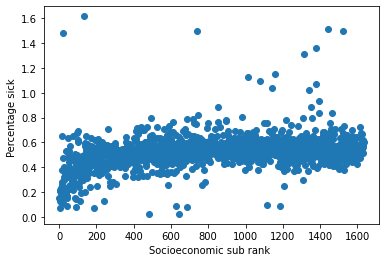

In [ ]:

import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Select the relevant columns
selected_df = filtered_df3.select("per_acc", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["per_acc"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank ")
plt.ylabel("Percentage sick ")

# Show the plot
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
#filtered_df3.write.mode("overwrite").option("header", "true").csv("/content/drive/MyDrive/runi/BDP project/corona final project/filtered_df3.csv")

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
#p_value = t.sf(abs(float(t_statistic)), deg_f) * 2
p_value = t.sf(abs(t_statistic), deg_f) * 2
# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant. p_value= 5.4850865997459056e-42 correlation =  0.3518834224502849


In [ ]:
t_statistic

14.040731190099136

#correlation between infected percentage and scocioeconomic city rank

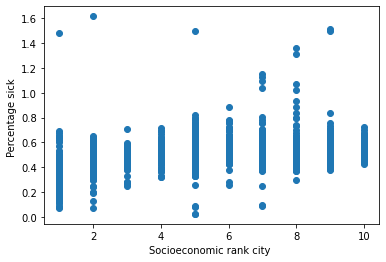

In [ ]:

import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Select the relevant columns
selected_df = filtered_df3.select("per_acc", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["per_acc"])

# Set the axis labels
plt.xlabel("Socioeconomic rank city ")
plt.ylabel("Percentage sick ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("per_acc"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("per_acc", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
#p_value = t.sf(abs(float(t_statistic)), deg_f) * 2
p_value = t.sf(abs(t_statistic), deg_f) * 2
# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant. p_value= 5.922717127049541e-47 correlation =  0.37148927737699866


# First vaccination correlation between infected percentage and socioeconomic status

In [ ]:
 #create a new column "vac1_per" that contains the percentage of accumulated_vaccination_first_dose in population
filtered_df3 = filtered_df3.withColumn("vac1_per", filtered_df3["accumulated_vaccination_first_dose"] / filtered_df3["pop_2019"])


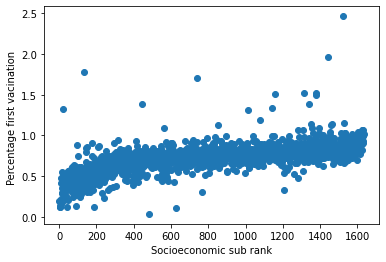

In [ ]:

import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Select the relevant columns
selected_df = filtered_df3.select("vac1_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["vac1_per"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank")
plt.ylabel("Percentage first vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac1_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac1_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
#p_value = t.sf(abs(float(t_statistic)), deg_f) * 2
p_value = t.sf(abs(t_statistic), deg_f) * 2
# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant. p_value= 1.2086844731084487e-148 correlation =  0.6191641146298156


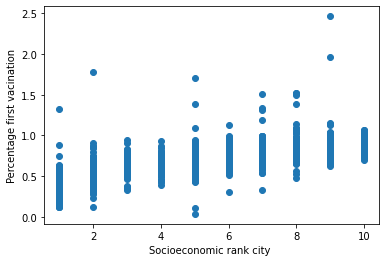

In [ ]:
# This one is the same but for 10 city clusters
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Select the relevant columns
selected_df = filtered_df3.select("vac1_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["vac1_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank city ")
plt.ylabel("Percentage first vacination")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col, corr, lit
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac1_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac1_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
#p_value = t.sf(abs(float(t_statistic)), deg_f) * 2
p_value = t.sf(abs(t_statistic), deg_f) * 2
# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")

The correlation is statistically significant. p_value= 6.166946656493405e-160 correlation =  0.6371057070957207


# Second vaccination correlation between infected percentage and socioeconomic status

In [ ]:
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+------------+--------------+-------------+------------------+------------------+-------------------+-------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_first_dose_on_date|accumulated_vaccinati

In [ ]:
 #create a new column "vac2_per" that contains the percentage of accumulated_vaccination_second_dose in population
filtered_df3 = filtered_df3.withColumn("vac2_per", filtered_df3["accumulated_vaccination_second_dose"] / filtered_df3["pop_2019"])


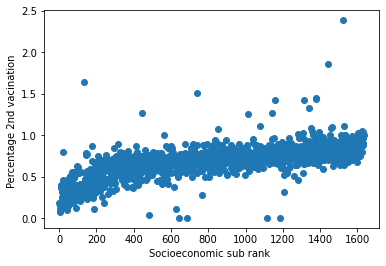

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("vac2_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["vac2_per"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank ")
plt.ylabel("Percentage 2nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac2_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac2_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant. p_value= 2.0009523188069275e-196 correlation =  0.6879438277596097


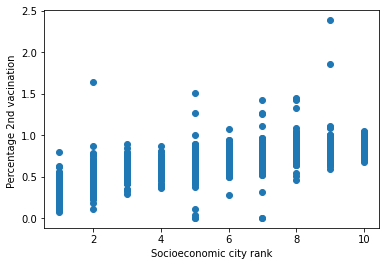

In [ ]:
# And for city clusters rank:

# Select the relevant columns
selected_df = filtered_df3.select("vac2_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["vac2_per"])

# Set the axis labels
plt.xlabel("Socioeconomic city rank")
plt.ylabel("Percentage 2nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac2_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac2_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant. p_value= 6.337198800275112e-215 correlation =  0.7102458393996005


# Third vaccination correlation between infected percentage and socioeconomic status

In [ ]:
 #create a new column "vac3_per" that contains the percentage of accumulated_vaccination_third_dose in population
filtered_df3 = filtered_df3.withColumn("vac3_per", filtered_df3["accumulated_vaccination_third_dose"] / filtered_df3["pop_2019"])


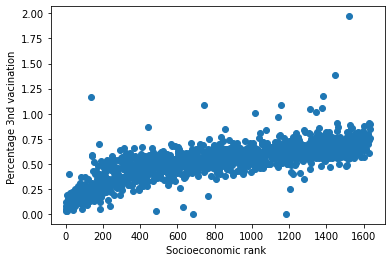

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("vac3_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["vac3_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("Percentage 3nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac3_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac3_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant. p_value= 2.0044573882075565e-272 correlation =  0.768166239238191


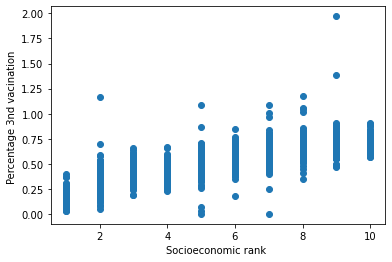

In [ ]:
# And for city clusters rank:

# Select the relevant columns
selected_df = filtered_df3.select("vac3_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["vac3_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank ")
plt.ylabel("Percentage 3nd vacination ")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("vac3_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("vac3_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


The correlation is statistically significant. p_value= 3.0129942211963806e-297 correlation =  0.7888705300953863


In [ ]:
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+------------+--------------+-------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|accumulated_vaccination_first_dose|new_vacc_

# Correlation between mortality percentage and socioeconomic status

In [ ]:
import pyspark.sql.functions as F

# Filter out rows with accumulated_deaths less than 15
filtered_df4 = filtered_df3.filter(F.col("accumulated_deaths") >= 6)

# Create a new column for the percentage of the mortality in population 
filtered_df4 = filtered_df4.withColumn("mortal_per", F.col("accumulated_deaths") / F.col("pop_2019"))



In [ ]:
print(filtered_df4.count())

1357


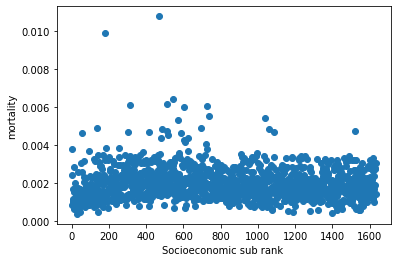

In [ ]:
# Select the relevant columns
selected_df = filtered_df4.select("mortal_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["mortal_per"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank ")
plt.ylabel("mortality")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df4.select(col("mortal_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("mortal_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)
if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  -0.023905778458343005
The correlation is not statistically significant.


In [ ]:
# The same for city clusters rank:

import pyspark.sql.functions as F

# Filter out rows with accumulated_deaths less than 15
filtered_df4 = filtered_df3.filter(F.col("accumulated_deaths") >= 14)

# Create a new column for the percentage of the mortality in population 
filtered_df4 = filtered_df4.withColumn("mortal_per", F.col("accumulated_deaths") / F.col("pop_2019"))



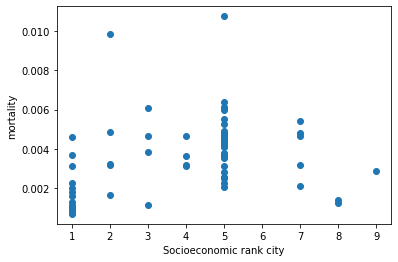

In [ ]:
# Select the relevant columns
selected_df = filtered_df4.select("mortal_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["mortal_per"])

# Set the axis labels
plt.xlabel("Socioeconomic rank city")
plt.ylabel("mortality")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df4.select(col("mortal_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("mortal_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  0.30796058387337333
The correlation is statistically significant. p_value= 0.012572325779180405 correlation =  0.30796058387337333


# Correlation between lab testing diagnostic percentage and socioeconomic status

In [ ]:
 #create a new column "test_per" that contains the percentage of accumulated_diagnostic_tests in population
filtered_df3 = filtered_df3.withColumn("test_per", filtered_df3["accumulated_diagnostic_tests"] / filtered_df3["pop_2019"])


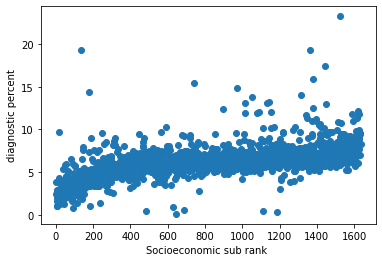

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("test_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["test_per"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank ")
plt.ylabel("diagnostic percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("test_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("test_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  0.5656683679694008
The correlation is statistically significant. p_value= 5.753313151024862e-119 correlation =  0.5656683679694008


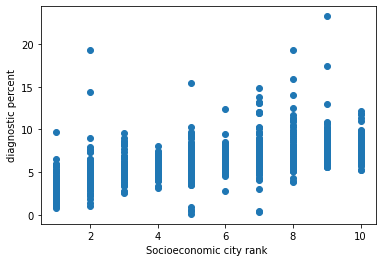

In [ ]:
# The same for city clusters rank:

# Select the relevant columns
selected_df = filtered_df3.select("test_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["test_per"])

# Set the axis labels
plt.xlabel("Socioeconomic city rank ")
plt.ylabel("diagnostic percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("test_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("test_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  0.5820683666835753
The correlation is statistically significant. p_value= 1.755957967863569e-127 correlation =  0.5820683666835753


# Correlation between hospitalization percentage and socioeconomic status


In [ ]:
 #create a new column "hospital_per" that contains the percentage of accumulated_hospitalized in population
filtered_df3 = filtered_df3.withColumn("hospital_per", filtered_df3["accumulated_hospitalized"] / filtered_df3["pop_2019"])


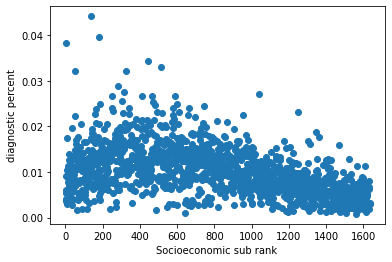

In [ ]:
# Select the relevant columns
selected_df = filtered_df3.select("hospital_per", "socio_rank_2019")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_2019"], pandas_df["hospital_per"])

# Set the axis labels
plt.xlabel("Socioeconomic sub rank ")
plt.ylabel("diagnostic percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("hospital_per"), col("socio_rank_2019"))

# Calculate the correlation between the columns
correlation = selected_df.corr("hospital_per", "socio_rank_2019")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  -0.46817764399072254
The correlation is statistically significant. p_value= 5.109030484883402e-77 correlation =  -0.46817764399072254


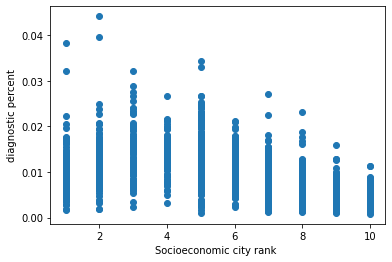

In [ ]:
# The same for city clusters rank:

# Select the relevant columns
selected_df = filtered_df3.select("hospital_per", "socio_rank_city")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["socio_rank_city"], pandas_df["hospital_per"])

# Set the axis labels
plt.xlabel("Socioeconomic city rank ")
plt.ylabel("diagnostic percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = filtered_df3.select(col("hospital_per"), col("socio_rank_city"))

# Calculate the correlation between the columns
correlation = selected_df.corr("hospital_per", "socio_rank_city")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  -0.418157601712498
The correlation is statistically significant. p_value= 3.0644953250759696e-60 correlation =  -0.418157601712498


# Correlation between mortality percentage and distance from hospital

In [ ]:
filtered_df3.show()

+---------+---------+------+-------------------+-----------------+-----------------+----------------------+----------------------+------------------------+------------------------+------------------+------------------+----------------------------+----------------------------+----------------------------------+---------------------------+-----------------------------------+----------------------------+----------------------------------+---------------------------+----------+--------+---------------+---------------+------------+--------------+-------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+
|town_code|agas_code|  town|               date|accumulated_cases|new_cases_on_date|accumulated_recoveries|new_recoveries_on_date|accumulated_hospitalized|new_hospitalized_on_date|accumulated_deaths|new_deaths_on_date|accumulated_diagnostic_tests|new_diagnostic_tests_on_date|ac

In [ ]:
filtered_df3.columns

['town_code',
 'agas_code',
 'town',
 'date',
 'accumulated_cases',
 'new_cases_on_date',
 'accumulated_recoveries',
 'new_recoveries_on_date',
 'accumulated_hospitalized',
 'new_hospitalized_on_date',
 'accumulated_deaths',
 'new_deaths_on_date',
 'accumulated_diagnostic_tests',
 'new_diagnostic_tests_on_date',
 'accumulated_vaccination_first_dose',
 'new_vacc_first_dose_on_date',
 'accumulated_vaccination_second_dose',
 'new_vacc_second_dose_on_date',
 'accumulated_vaccination_third_dose',
 'new_vacc_third_dose_on_date',
 'row_number',
 'pop_2019',
 'socio_rank_2019',
 'socio_rank_city',
 'relgion_code',
 'setelment_code',
 'geo_cordints',
 'lat',
 'long']

In [ ]:
from pyspark.sql.functions import sum

summed_df = filtered_df3.groupBy("town_code").agg(
    sum("accumulated_cases").alias("total_cases"),
    sum("accumulated_recoveries").alias("total_recoveries"),
    sum("accumulated_hospitalized").alias("total_hospitalized"),
    sum("accumulated_deaths").alias("total_deaths"),
    sum("accumulated_diagnostic_tests").alias("total_diagnostic_tests"),
    sum("accumulated_vaccination_first_dose").alias("total_vaccination_first_dose"),
    sum("accumulated_vaccination_second_dose").alias("total_vaccination_second_dose"),
    sum("accumulated_vaccination_third_dose").alias("total_vaccination_third_dose"),
    sum("pop_2019").alias("total_pop")
)

In [ ]:
summed_df.show()

+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+
|town_code|total_cases|total_recoveries|total_hospitalized|total_deaths|total_diagnostic_tests|total_vaccination_first_dose|total_vaccination_second_dose|total_vaccination_third_dose|total_pop|
+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+
|       31|      17370|           17317|               200|          42|                174502|                     18567.0|                        16499|                     11557.0|  30655.0|
|     1139|      25598|           25444|               468|          84|                266707|                     36285.0|                        34548|                     27625.0|  46171.0|
|     3000|     334893|       

In [ ]:
summed_df.count()

262

In [ ]:
from pyspark.sql.functions import first
joined_df5=filtered_df3.select([  'town_code','town', 'date', 'socio_rank_city', 'relgion_code', 'setelment_code', 'geo_cordints', 'lat', 'long'])

joined_df5.show()


+---------+------+-------------------+---------------+------------+--------------+-------------+------------------+------------------+
|town_code|  town|               date|socio_rank_city|relgion_code|setelment_code| geo_cordints|               lat|              long|
+---------+------+-------------------+---------------+------------+--------------+-------------+------------------+------------------+
|       31|אופקים|2022-12-25 00:00:00|              4|         1.0|           160|1.637757969E9|  31.3075881499684|34.619489412633754|
|       31|אופקים|2022-12-25 00:00:00|              4|         1.0|           160|1.637757969E9|  31.3075881499684|34.619489412633754|
|       31|אופקים|2022-12-25 00:00:00|              3|         1.0|           160|1.637757969E9|  31.3075881499684|34.619489412633754|
|       31|אופקים|2022-12-25 00:00:00|              3|         1.0|           160|1.637757969E9|  31.3075881499684|34.619489412633754|
|       31|אופקים|2022-12-25 00:00:00|              1| 

In [ ]:
joined_df5 = joined_df5.groupBy("town_code").agg(
    *[first(c).alias(c) for c in joined_df5.columns if c != "town_code"])


In [ ]:
joined_df6 = summed_df.join(joined_df5.select(['town_code', 'date', 'socio_rank_city', 'relgion_code', 'setelment_code', 'geo_cordints', 'lat', 'long']), ['town_code'], "left")
joined_df6.show()

+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+------------------+
|town_code|total_cases|total_recoveries|total_hospitalized|total_deaths|total_diagnostic_tests|total_vaccination_first_dose|total_vaccination_second_dose|total_vaccination_third_dose|total_pop|               date|socio_rank_city|relgion_code|setelment_code| geo_cordints|               lat|              long|
+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+------------------+
|       31|      17370|           17317|               200|          4

In [ ]:
from pyspark.sql.functions import radians, asin, sin, cos, sqrt

# Define the Haversine formula as a UDF
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [col(lat1).cast("string"), col(lon1).cast("string"), col(lat2).cast("string"), col(lon2).cast("string")])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km


In [ ]:
hospitals.columns

['Hospital', 'h_lat', 'h_long']

In [ ]:
hospitals = hospitals.withColumnRenamed(" lat","h_lat")



In [ ]:
hospitals = hospitals.withColumnRenamed(" long","h_long")

In [ ]:
hospitals.show()

+--------------------+------------------+------------------+
|            Hospital|             h_lat|            h_long|
+--------------------+------------------+------------------+
|               Sheba|32.050921977198726|34.844090786162425|
|Mayanei HaYeshua ...|  32.0864161615671| 34.84426245097149|
|Tel Aviv Sourasky...| 32.08128939055867|34.789967430026174|
| Meir Medical Center| 32.18387390077495| 34.89661739992947|
|    Laniado Hospital| 32.35111303624267|34.856821755921324|
|Shamir Medical Ce...|31.966526142245904| 34.83956680094388|
|Wolfson Medical C...| 32.04678787793236| 34.75922747938785|
|  Ziv Medical Center| 33.00041909211144|35.501124136155596|
| Emek Medical Center|32.635722136875586| 35.31160997790102|
|Rambam Health Car...| 32.84422132671596|34.986140005806085|
|   Bnai Zion Medical| 32.81017864475674|  34.9930064608153|
|Hillel Yaffe Medi...| 32.45148499748091| 34.89577799724066|
|           bailinson| 32.09057665137987|34.867335370494494|
|Soroka Medical Ce...|31

In [ ]:
pairs = joined_df6.crossJoin(hospitals)


In [ ]:
pairs.count()

1701

In [ ]:
pairs.show()

+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+-----------------+-----------------+--------------------+------------------+------------------+
|town_code|total_cases|total_recoveries|total_hospitalized|total_deaths|total_diagnostic_tests|total_vaccination_first_dose|total_vaccination_second_dose|total_vaccination_third_dose|total_pop|               date|socio_rank_city|relgion_code|setelment_code| geo_cordints|              lat|             long|            Hospital|             h_lat|            h_long|
+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+---------

In [ ]:
pairs.write.mode("overwrite").option("header", "true").csv("/content/drive/MyDrive/runi/BDP project/corona final project/pairs.csv")

In [ ]:
pairs = pairs.dropna(subset=["lat", "long", "h_lat", "h_long"])

In [ ]:
distances = pairs.select(
    "lat", "long", "h_lat", "h_long",
    haversine("lat", "long", "h_lat", "h_long").alias("distance")
)
distances.show()

+----------------+------------------+------------------+------------------+------------------+
|             lat|              long|             h_lat|            h_long|          distance|
+----------------+------------------+------------------+------------------+------------------+
|31.3075881499684|34.619489412633754|32.050921977198726|34.844090786162425| 85.34361384056815|
|31.3075881499684|34.619489412633754|  32.0864161615671| 34.84426245097149| 89.17436038297114|
|31.3075881499684|34.619489412633754| 32.08128939055867|34.789967430026174| 87.53049462004721|
|31.3075881499684|34.619489412633754| 32.18387390077495| 34.89661739992947|100.90064522248791|
|31.3075881499684|34.619489412633754| 32.35111303624267|34.856821755921324|118.18099065487142|
|31.3075881499684|34.619489412633754|31.966526142245904| 34.83956680094388| 76.17513211035842|
|31.3075881499684|34.619489412633754| 32.04678787793236| 34.75922747938785| 83.25209264569789|
|31.3075881499684|34.619489412633754| 33.000419092

In [ ]:
from pyspark.sql.functions import min

# Select only the necessary columns
lat_long = distances.select('lat', 'long', "h_lat", "h_long", 'distance')

# Group by the lat and long columns and find the shortest distance
shortest_lat_long = lat_long.groupBy('lat', 'long').agg(min('distance').alias('shortest_distance'))

# Show the unique lat and long values and the shortest distance

In [ ]:
shortest_lat_long.count()


81

In [ ]:
merged_df = joined_df6.join(shortest_lat_long, on=["lat", "long"], how="left")
merged_df.show()

+------------------+------------------+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+
|               lat|              long|town_code|total_cases|total_recoveries|total_hospitalized|total_deaths|total_diagnostic_tests|total_vaccination_first_dose|total_vaccination_second_dose|total_vaccination_third_dose|total_pop|               date|socio_rank_city|relgion_code|setelment_code| geo_cordints| shortest_distance|
+------------------+------------------+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+
|31.258863701

In [ ]:
merged_df.count()

81

In [ ]:
merged_df.show()


+------------------+------------------+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+
|               lat|              long|town_code|total_cases|total_recoveries|total_hospitalized|total_deaths|total_diagnostic_tests|total_vaccination_first_dose|total_vaccination_second_dose|total_vaccination_third_dose|total_pop|               date|socio_rank_city|relgion_code|setelment_code| geo_cordints| shortest_distance|
+------------------+------------------+---------+-----------+----------------+------------------+------------+----------------------+----------------------------+-----------------------------+----------------------------+---------+-------------------+---------------+------------+--------------+-------------+------------------+
|31.258863701

# Correlation between mortality percentage and distance from hospital

In [ ]:
 #create a new column "acc2_per" that contains the percentage of accumulated_hospitalized in population
merged_df = merged_df.withColumn("death2_per", merged_df["total_deaths"] / merged_df["total_pop"])


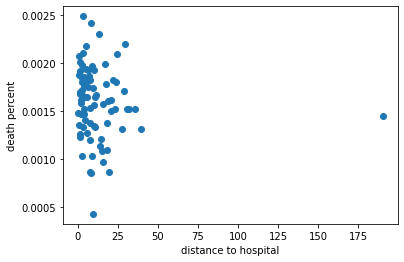

In [ ]:
# Select the relevant columns
selected_df = merged_df.select("death2_per", "shortest_distance")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["shortest_distance"], pandas_df["death2_per"])

# Set the axis labels
plt.xlabel("distance to hospital")
plt.ylabel("death percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = merged_df.select(col("death2_per"), col("shortest_distance"))

# Calculate the correlation between the columns
correlation = selected_df.corr("death2_per", "shortest_distance")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  -0.08526385919162889
The correlation is not statistically significant.


In [ ]:
 #create a new column "acc2_per" that contains the percentage of accumulated_hospitalized in population
merged_df = merged_df.withColumn("hospital2_per", merged_df["total_hospitalized"] / merged_df["total_pop"])


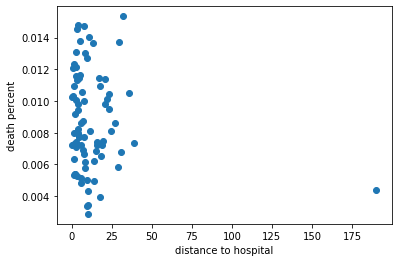

In [ ]:
# Select the relevant columns
selected_df = merged_df.select("hospital2_per", "shortest_distance")

# Convert the DataFrame to a Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create a scatter plot using Matplotlib
plt.scatter(pandas_df["shortest_distance"], pandas_df["hospital2_per"])

# Set the axis labels
plt.xlabel("distance to hospital")
plt.ylabel("death percent")

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from scipy.stats import t

# Select the relevant columns
selected_df = merged_df.select(col("hospital2_per"), col("shortest_distance"))

# Calculate the correlation between the columns
correlation = selected_df.corr("hospital2_per", "shortest_distance")

# Calculate the degrees of freedom
n = selected_df.count()
deg_f = n - 2

# Calculate the t-statistic
t_statistic = correlation * ((n - 2) ** 0.5) / ((1 - correlation ** 2) ** 0.5)

# Calculate the p-value
p_value = t.sf(abs(t_statistic), deg_f) * 2

# Print the results
print("correlation = ",correlation)

if p_value < 0.05:
    print("The correlation is statistically significant. p_value=", p_value,"correlation = ",correlation)
else:
    print("The correlation is not statistically significant.")


correlation =  -0.1455400604599862
The correlation is not statistically significant.
